In [129]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf

## Read data

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,idx,balancing
0,0,0,1.50
1,1,1,2.00
2,2,2,1.25
3,3,3,2.00
4,4,4,2.00


<AxesSubplot:>

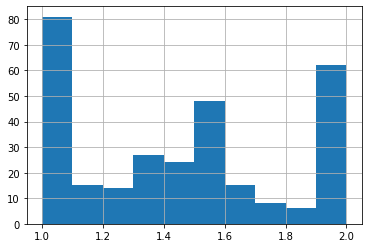

In [3]:
data["balancing"].hist()

In [4]:
data[data["balancing"] == 1.5].count()

Unnamed: 0    39
idx           39
balancing     39
dtype: int64

In [5]:
data["balancing1"] = data["balancing"] - 1

In [54]:
path_maps = "gen_maps"
SIZE = 8
BORDER = 6
X = []
for folder in os.listdir(path_maps):
    m = np.load(os.path.join(path_maps, folder, "map.npy"))
    b = BORDER + 1
    s = b+SIZE - 2
    m = (m[b:s, b:s] -1)
    m[m==8] = 2
    m[m==6] = 5

    X.append(tf.one_hot(m, 6))

In [31]:
X[15]

<tf.Tensor: shape=(6, 6, 6), dtype=float32, numpy=
array([[[0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0.]],

       [[0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.]],

       [[0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0.

In [25]:
tf.one_hot(X[15], 6).shape

TensorShape([6, 6, 6])

## Training

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, data["balancing1"], test_size=0.2, shuffle=True)
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

In [79]:
len(y_train)

240

In [228]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input((6, 6, 6)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.build()
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(x=X_train, y=y_train, epochs=20)

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 6, 6, 16)          112       
                                                                 
 dense_161 (Dense)           (None, 6, 6, 8)           136       
                                                                 
 flatten_52 (Flatten)        (None, 288)               0         
                                                                 
 dense_162 (Dense)           (None, 16)                4624      
                                                                 
 dense_163 (Dense)           (None, 12)                204       
                                                                 
 dense_164 (Dense)           (None, 8)                 104       
                                                                 
 dense_165 (Dense)           (None, 1)               

In [229]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input((6, 6, 6)))
model.add(tf.keras.layers.Conv2D(32, (1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(16, (1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(8, (1, 1), activation='relu'))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(32, activation='relu'))
#model.add(tf.keras.layers.Dense(16, activation='relu'))
#model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.build()
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(x=X_train, y=y_train, epochs=30)

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 6, 6, 32)          224       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 3, 3, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 3, 3, 16)          528       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 1, 1, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 1, 1, 8)           136       
                                                                 
 flatten_53 (Flatten)        (None, 8)               

In [230]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 15ms/step - loss: 0.1268


0.12676651775836945

2/2 [==============================] - 0s 0s/step


<AxesSubplot:ylabel='Frequency'>

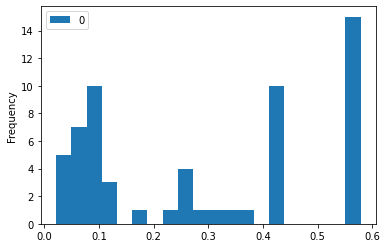

In [231]:
# plot hist for MLP eval
pd.DataFrame(abs(model.predict(X_test) - y_test)[0]).plot.hist(bins=20)

In [214]:
i = 12
print("Pred", model.predict(X_test)[i][0])
print("True", y_test[i].numpy())

2/2 [==============================] - 0s 0s/step
Pred 0.45109838
True 1.0


2/2 [==============================] - 0s 0s/step - loss: 0.1295
eval 0.12951739132404327
2/2 [==============================] - 0s 16ms/step


(array([2., 7., 8., 4., 4., 1., 1., 0., 2., 3., 2., 1., 2., 3., 4., 1., 0.,
        3., 6., 6.]),
 array([3.12888622e-04, 3.08208111e-02, 6.13287336e-02, 9.18366560e-02,
        1.22344579e-01, 1.52852501e-01, 1.83360423e-01, 2.13868346e-01,
        2.44376268e-01, 2.74884191e-01, 3.05392113e-01, 3.35900036e-01,
        3.66407958e-01, 3.96915881e-01, 4.27423803e-01, 4.57931726e-01,
        4.88439648e-01, 5.18947571e-01, 5.49455493e-01, 5.79963416e-01,
        6.10471338e-01]),
 <BarContainer object of 20 artists>)

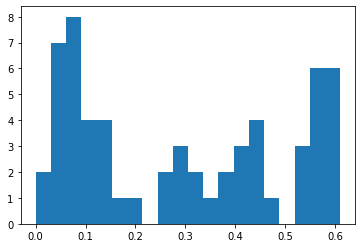

In [219]:
print("eval", model.evaluate(X_test, y_test))
pred = model.predict(X_test)
diffs = [abs(p-t).numpy()[0] for p, t in zip(pred, y_test)]
plt.hist(diffs, bins=20)